# UMAP Analysis of Synthetic Microscopy Cell Measurements
In this notebook, we generate a synthetic dataset of cell measurements and perform a UMAP analysis.

## Importing Required Libraries
We will start by importing necessary libraries for data creation, manipulation, and visualization.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

## Generating Synthetic Data
Let's create a synthetic dataset with random measurements for intensity, aspect ratio, perimeter, and elongation.

In [2]:
np.random.seed(42)
n_samples = 200

data = {
    'intensity': np.random.uniform(100, 200, n_samples),
    'aspect_ratio': np.random.uniform(0.5, 1.5, n_samples),
    'perimeter': np.random.uniform(50, 150, n_samples),
    'elongation': np.random.uniform(0.1, 0.9, n_samples)
}

df = pd.DataFrame(data)
df.head()

,intensity,aspect_ratio,perimeter,elongation
0,137.454012,1.142032,60.312387,0.235148
1,195.071431,0.584140,140.255291,0.322872
2,173.199394,0.661629,100.525237,0.241608
3,159.865848,1.398554,132.645747,0.170962
4,115.601864,1.106429,82.004960,0.196509


## Standardizing the Data
We'll standardize the data before applying UMAP to ensure all features have equal weight.

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,intensity,aspect_ratio,perimeter,elongation
0,-0.372140,0.470994,-1.362137,-1.113971
1,1.586615,-1.437843,1.245778,-0.719721
2,0.843056,-1.172714,-0.050305,-1.084937
3,0.389770,1.348691,0.997537,-1.402435
4,-1.115023,0.349180,-0.654477,-1.287624


## Applying UMAP
Now, we'll apply UMAP to the scaled data and add the results to the original DataFrame.

In [4]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_df)
df['UMAP_1'] = embedding[:, 0]
df['UMAP_2'] = embedding[:, 1]
df.head()

,intensity,aspect_ratio,perimeter,elongation,UMAP_1,UMAP_2
0,137.454012,1.142032,60.312387,0.235148,8.771876,4.743884
1,195.071431,0.584140,140.255291,0.322872,5.018341,2.339002
2,173.199394,0.661629,100.525237,0.241608,5.606443,3.416380
3,159.865848,1.398554,132.645747,0.170962,6.908598,4.529231
4,115.601864,1.106429,82.004960,0.196509,5.884510,6.679801


## Visualizing UMAP
We will use seaborn to visualize the UMAP results.

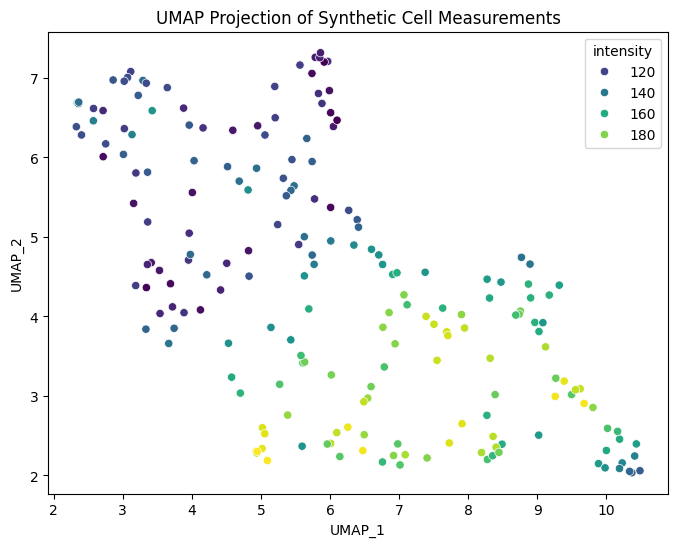

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='intensity', palette='viridis')
plt.title('UMAP Projection of Synthetic Cell Measurements')
plt.savefig('umap_projection.png')
plt.show()